# **ICTAK FINAL PROJECT**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving accesskey.json to accesskey.json


In [ ]:
from google.cloud import bigquery
from google.oauth2 import service_account

key_path = "accesskey.json"

credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

client = bigquery.Client(credentials=credentials, project=credentials.project_id,)


query_string = """SELECT * FROM `ict-project-b5.ictproject.datasetTest`"""

cdc = (client.query(query_string)
    .result()
    .to_dataframe()
)

cdc.head()

,int64_field_0,Unnamed__0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,270,270.0,2020-06-21 13:46:49+00:00,NaN,fraud_Towne LLC,misc_pos,5.70,Cheryl,Ballard,F,...,47.3551,-96.7980,771.0,"Scientist, audiological",1972-06-14,a20d919c8ab03967488d5308cfcc4dd1,1.371822e+09,48.295603,-96.503844,0.0
1,319,319.0,2020-06-21 14:02:18+00:00,NaN,fraud_Weimann-Lockman,kids_pets,73.57,Erin,Chavez,F,...,39.5994,-105.0044,NaN,Water engineer,1975-07-31,b031101d820f6ec2704a76617a5d6bd3,1.371823e+09,38.808567,-104.877216,0.0
2,628,628.0,2020-06-21 15:45:21+00:00,NaN,None,shopping_net,16.83,None,Moreno,F,...,37.7418,-80.4626,4575.0,Statistician,1991-10-22,8c4df8b92b40506609b81e416c52923d,1.371830e+09,36.807586,-80.715879,0.0
3,958,958.0,2020-06-21 17:42:43+00:00,NaN,fraud_Wiza LLC,misc_pos,8.44,None,Evans,M,...,32.9643,-96.6012,NaN,Site engineer,1985-06-20,b3bf2e74eb6149c719117210acb3c2ea,1.371837e+09,33.577256,-97.436814,0.0
4,1047,1047.0,2020-06-21 18:09:24+00:00,NaN,fraud_Abshire PLC,entertainment,40.56,Theresa,Blackwell,None,...,39.3716,-77.8229,1925.0,Systems developer,None,None,1.371838e+09,39.084257,-78.197603,NaN


In [ ]:
cdc.isna().sum()

int64_field_0                0
Unnamed__0               55572
trans_date_trans_time    55572
cc_num                   55572
merchant                 55572
category                 55572
amt                      55572
first                    55572
last                     55572
gender                   55572
street                   55572
city                     55572
state                    55572
zip                      55572
lat                      55572
long                     55572
city_pop                 55572
job                      55572
dob                      55572
trans_num                55572
unix_time                55572
merch_lat                55572
merch_long               55572
is_fraud                 55572
dtype: int64

In [ ]:
rows = cdc.sample(frac =.10)

In [ ]:
rows.head()

,int64_field_0,Unnamed__0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
73484,332074,332074.0,2020-10-26 15:17:55+00:00,3.017599e+13,"fraud_Walter, Hettinger and Kessler",None,10.84,Rebecca,Butler,F,...,47.5375,-95.9941,516.0,Applications developer,1966-06-07,312d5965902413145dac8ab42f38a2db,NaN,47.824850,-96.054007,0.0
45684,202618,202618.0,2020-08-31 14:02:38+00:00,3.560797e+15,fraud_Schiller Ltd,personal_care,39.46,Janet,Turner,F,...,46.1838,-101.2589,77.0,Film/video editor,1989-12-17,d063962c2dd5c7dc3f6dcd2a9277a7c5,1.377958e+09,45.470052,-101.091648,0.0
383979,354685,354685.0,2020-11-05 11:36:37+00:00,NaN,"fraud_Monahan, Bogisich and Ledner",misc_pos,102.28,Tara,None,F,...,41.6060,-109.2300,27971.0,Music therapist,1984-08-01,135e13af86847a7eb16e4ef30be19b26,1.383651e+09,NaN,-109.374947,0.0
4683,470590,470590.0,2020-12-13 13:33:27+00:00,NaN,fraud_McCullough LLC,misc_pos,NaN,Michelle,Gregory,F,...,32.5486,-80.3070,2408.0,"Sales professional, IT",1997-07-05,6c8289cc1183112f4b2b0f0ed962e2be,1.386942e+09,32.415389,-80.031921,0.0
300411,122128,122128.0,2020-08-03 03:40:58+00:00,6.011975e+15,"fraud_Greenholt, O'Hara and Balistreri",shopping_net,1.43,Haley,Wagner,F,...,39.0305,-76.5515,92106.0,"Accountant, chartered certified",1943-05-28,477519bef2ee7c98ad346f4d2d92c123,1.375501e+09,39.570502,-77.409661,0.0


In [ ]:
rows["is_fraud"].value_counts()

0.0    49774
1.0      197
Name: is_fraud, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


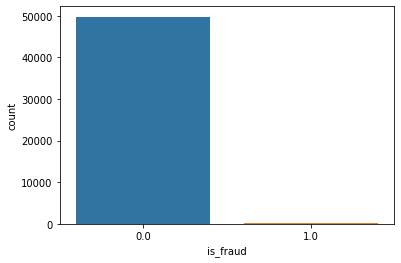

In [ ]:
import seaborn as sns
sns.countplot(rows['is_fraud'])

The data set is highly unbalanced.To get a balanced data set we are using SMOTE

In [ ]:
rows.shape

(55572, 24)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [ ]:
rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55572 entries, 73484 to 374576
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   int64_field_0          55572 non-null  int64              
 1   Unnamed__0             49868 non-null  float64            
 2   trans_date_trans_time  50019 non-null  datetime64[ns, UTC]
 3   cc_num                 50121 non-null  float64            
 4   merchant               49979 non-null  object             
 5   category               49999 non-null  object             
 6   amt                    50019 non-null  float64            
 7   first                  50070 non-null  object             
 8   last                   49922 non-null  object             
 9   gender                 50011 non-null  object             
 10  street                 50190 non-null  object             
 11  city                   49905 non-null  object    

In [ ]:
rows.describe().T

,count,mean,std,min,25%,50%,75%,max
int64_field_0,55572.0,2.768637e+05,1.605046e+05,5.000000e+00,1.379575e+05,2.762585e+05,4.154352e+05,5.557130e+05
Unnamed__0,49868.0,2.770737e+05,1.605838e+05,5.000000e+00,1.377265e+05,2.767905e+05,4.157048e+05,5.557130e+05
cc_num,50121.0,4.243123e+17,1.318613e+18,6.041621e+10,1.800365e+14,3.520550e+15,4.642255e+15,4.992346e+18
amt,50019.0,6.954943e+01,1.370371e+02,1.000000e+00,9.600000e+00,4.748000e+01,8.351000e+01,8.517380e+03
zip,50021.0,4.875024e+04,2.687878e+04,1.257000e+03,2.629200e+04,4.808800e+04,7.201100e+04,9.992100e+04
lat,50043.0,3.855875e+01,5.043829e+00,2.002710e+01,3.474370e+01,3.937160e+01,4.189480e+01,6.568990e+01
long,50004.0,-9.018513e+01,1.381256e+01,-1.656723e+02,-9.679090e+01,-8.726020e+01,-8.015302e+01,-6.795030e+01
city_pop,49883.0,8.944883e+04,3.032905e+05,2.300000e+01,7.430000e+02,2.408000e+03,2.032800e+04,2.906700e+06
unix_time,50064.0,1.380654e+09,5.203168e+06,1.371817e+09,1.376004e+09,1.380721e+09,1.385849e+09,1.388534e+09
merch_lat,50036.0,3.855784e+01,5.075876e+00,1.903953e+01,3.481944e+01,3.938181e+01,4.196115e+01,6.661765e+01


In [ ]:
rows.isna().sum()

int64_field_0            0   
Unnamed__0               5704
trans_date_trans_time    5553
cc_num                   5451
merchant                 5593
category                 5573
amt                      5553
first                    5502
last                     5650
gender                   5561
street                   5382
city                     5667
state                    5595
zip                      5551
lat                      5529
long                     5568
city_pop                 5689
job                      5481
dob                      5575
trans_num                5417
unix_time                5508
merch_lat                5536
merch_long               5656
is_fraud                 5601
dtype: int64

In [ ]:
rows.isna().sum()/(len(rows))*100

int64_field_0            0.000000 
Unnamed__0               10.264162
trans_date_trans_time    9.992442 
cc_num                   9.808897 
merchant                 10.064421
category                 10.028432
amt                      9.992442 
first                    9.900669 
last                     10.166991
gender                   10.006838
street                   9.684733 
city                     10.197582
state                    10.068020
zip                      9.988843 
lat                      9.949255 
long                     10.019434
city_pop                 10.237170
job                      9.862881 
dob                      10.032031
trans_num                9.747715 
unix_time                9.911466 
merch_lat                9.961851 
merch_long               10.177787
is_fraud                 10.078817
dtype: float64

To sort the percentage of null values in descending order

In [ ]:
def meta_data(rows):
    total = rows.isnull().sum()
    percent = (rows.isnull().sum()/rows.isnull().count()*100)
    unique = rows.nunique()
    datatypes = rows.dtypes
    return pd.concat([total, percent, unique, datatypes], axis=1, keys=['Total', 'Percent', 'Unique', 'Data_Type']).sort_values(by="Percent", ascending=False)
#calculating meta-data for application_data
data=meta_data(rows)
data.head(23)

,Total,Percent,Unique,Data_Type
Unnamed__0,5704,10.264162,49868,float64
city_pop,5689,10.237170,828,float64
city,5667,10.197582,842,object
merch_long,5656,10.177787,49884,float64
last,5650,10.166991,468,object
is_fraud,5601,10.078817,2,float64
state,5595,10.068020,50,object
merchant,5593,10.064421,693,object
dob,5575,10.032031,900,object
category,5573,10.028432,14,object


In [ ]:
data.head(23)

,Total,Percent,Unique,Data_Type
Unnamed__0,5704,10.264162,49868,float64
city_pop,5689,10.237170,828,float64
city,5667,10.197582,842,object
merch_long,5656,10.177787,49884,float64
last,5650,10.166991,468,object
is_fraud,5601,10.078817,2,float64
state,5595,10.068020,50,object
merchant,5593,10.064421,693,object
dob,5575,10.032031,900,object
category,5573,10.028432,14,object


In [ ]:
rows.drop(['Unnamed__0'],axis=1,inplace=True)

In [ ]:
rows.shape

(55572, 23)

Filling of null values.Histogram is used to find whether the data is left or rightskewed or normally distributed.Based on this we have to use median and mean to fill the missing values

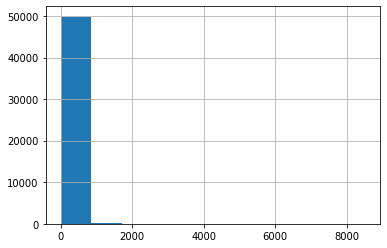

In [ ]:
rows['amt'].hist()

In [ ]:
rows['amt'].median()

47.48

In [ ]:
rows['amt'].fillna(47.21, inplace=True)

In [ ]:
rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55572 entries, 73484 to 374576
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   int64_field_0          55572 non-null  int64              
 1   trans_date_trans_time  50019 non-null  datetime64[ns, UTC]
 2   cc_num                 50121 non-null  float64            
 3   merchant               49979 non-null  object             
 4   category               49999 non-null  object             
 5   amt                    55572 non-null  float64            
 6   first                  50070 non-null  object             
 7   last                   49922 non-null  object             
 8   gender                 50011 non-null  object             
 9   street                 50190 non-null  object             
 10  city                   49905 non-null  object             
 11  state                  49977 non-null  object    

In [ ]:
col1=['amt','long','zip','lat','city_pop','cc_num','is_fraud','merch_lat','merch_long','unix_time']

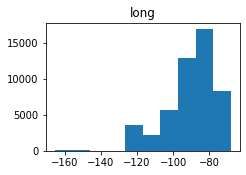

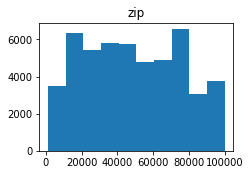

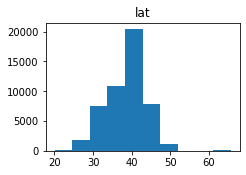

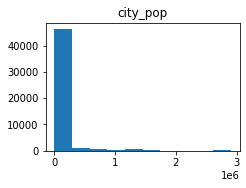

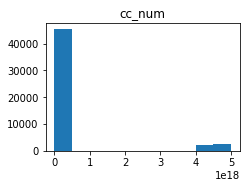

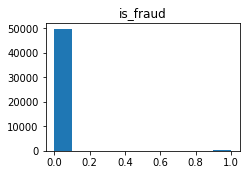

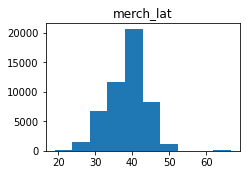

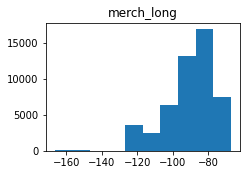

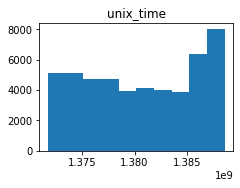

In [ ]:
for i in range(1,10):
    plt.figure(figsize=(16, 8))
    plt.subplot(3, 4, i+1)
    plt.title(col1[i])
    plt.hist(rows[col1[i]])

In [ ]:
median1=['amt','long','city_pop','cc_num','is_fraud','merch_long']


In [ ]:
for j in median1:
  rows[j].fillna(rows[j].median(), inplace=True)

In [ ]:
mean1=['zip','lat','merch_lat','unix_time']

In [ ]:
for k in mean1:
  rows[k].fillna(rows[k].mean(), inplace=True)

For categorical values mode is used to fill the missing values

In [ ]:
obj1=list(rows.select_dtypes(['object']).columns)

In [ ]:
print(list(rows.select_dtypes(['object']).columns))

['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']


In [ ]:
print(type(obj1))

<class 'list'>


In [ ]:
t1=['merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']

In [ ]:
for i in t1:
  print(rows[i].mode()[0])

fraud_Kilback LLC
gas_transport
47.21
Christopher
Smith
F
6983 Carrillo Isle
Birmingham
TX
Film/video editor
1988-09-15
00017954fb9236f8b82ea2237d521f92


In [ ]:
for j in t1:
  rows[j].fillna(rows[j].mode()[0],inplace=True)

In [ ]:
rows['trans_date_trans_time'].fillna(rows['trans_date_trans_time'].mode()[0],inplace=True)


In [ ]:
rows.isna().sum()

int64_field_0            0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55572 entries, 73484 to 374576
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   int64_field_0          55572 non-null  int64  
 1   trans_date_trans_time  55572 non-null  object 
 2   cc_num                 55572 non-null  float64
 3   merchant               55572 non-null  object 
 4   category               55572 non-null  object 
 5   amt                    55572 non-null  float64
 6   first                  55572 non-null  object 
 7   last                   55572 non-null  object 
 8   gender                 55572 non-null  object 
 9   street                 55572 non-null  object 
 10  city                   55572 non-null  object 
 11  state                  55572 non-null  object 
 12  zip                    55572 non-null  float64
 13  lat                    55572 non-null  float64
 14  long                   55572 non-null  float64
 1

In [ ]:
rows["is_fraud"].value_counts()

0.0    55375
1.0    197  
Name: is_fraud, dtype: int64

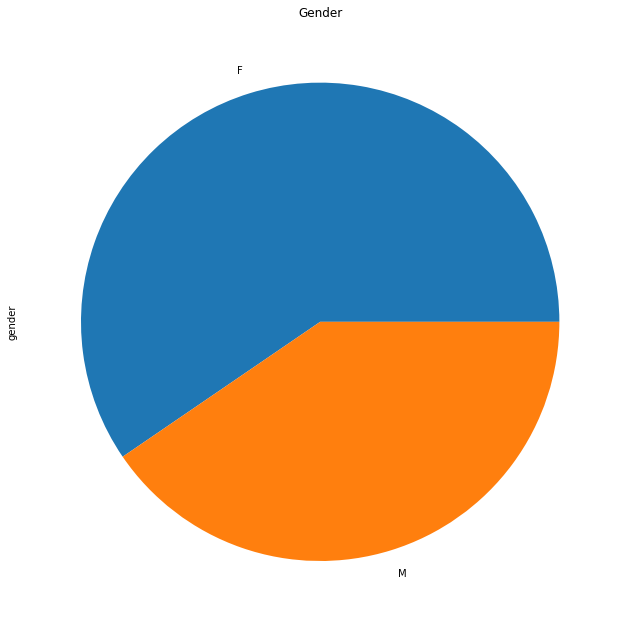

In [ ]:
#Pie Chart
labels=["F","M"]
rows['gender'].value_counts().plot(kind='pie', title='Gender',labels=labels,figsize=(11,11))
plt.show()

In [ ]:
rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55572 entries, 73484 to 374576
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   int64_field_0          55572 non-null  int64  
 1   trans_date_trans_time  55572 non-null  object 
 2   cc_num                 55572 non-null  float64
 3   merchant               55572 non-null  object 
 4   category               55572 non-null  object 
 5   amt                    55572 non-null  float64
 6   first                  55572 non-null  object 
 7   last                   55572 non-null  object 
 8   gender                 55572 non-null  object 
 9   street                 55572 non-null  object 
 10  city                   55572 non-null  object 
 11  state                  55572 non-null  object 
 12  zip                    55572 non-null  float64
 13  lat                    55572 non-null  float64
 14  long                   55572 non-null  float64
 1

In [ ]:
sns.color_palette("husl", 9)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8369430560927636, 0.5495828952802333, 0.1952683223448124),
 (0.6430915736746491, 0.6271955086583126, 0.19381135329796756),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20582072623426667, 0.6842209016721069, 0.5675558225732941),
 (0.2151139535594307, 0.6700707833028816, 0.7112365203426209),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.731751635642941, 0.5128186367840487, 0.9581005178234921),
 (0.9614880299080136, 0.3909885385134758, 0.8298287106954371)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


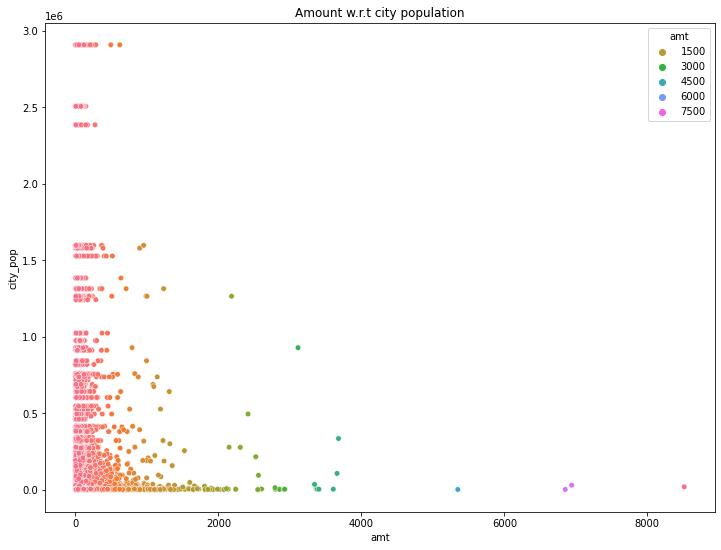

In [ ]:
plt.figure(figsize=(12,9))
plt.title("Amount w.r.t city population")
sns.scatterplot(rows["amt"],y=rows["city_pop"],hue=rows["amt"],s=30,palette="husl")
plt.show()

In [ ]:
rows.merchant.nunique()

693

In [ ]:
col11=rows.columns
col11

Index(['int64_field_0', 'trans_date_trans_time', 'cc_num', 'merchant',
       'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state',
       'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:

for i in col11:
  k=rows[i].nunique()
  print(k)


55572
49933
915
693
14
16239
341
468
2
915
842
50
904
903
902
828
475
900
50155
49981
49962
49885
2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.xticks>

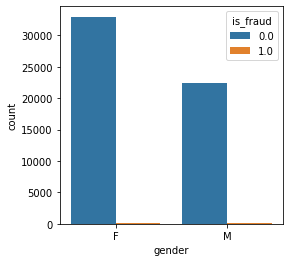

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,4))
sns.countplot('gender',hue='is_fraud',data=rows)
plt.xticks

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

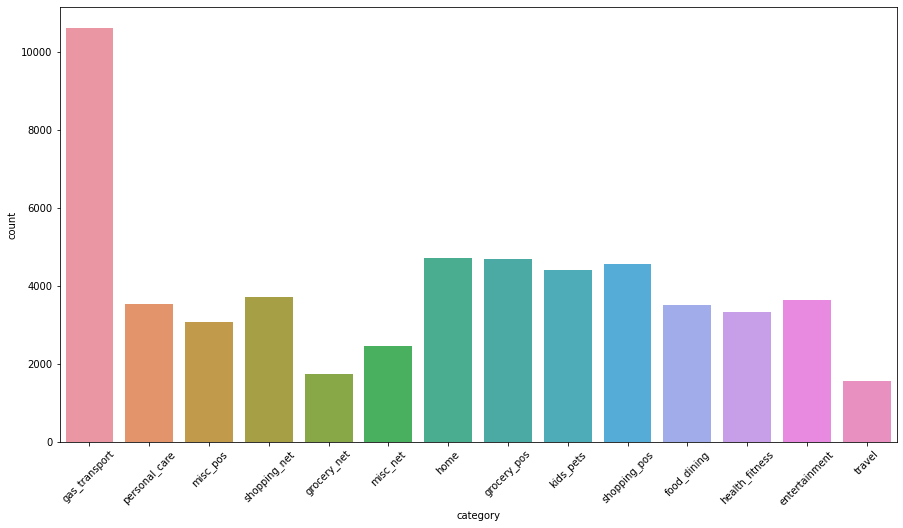

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.countplot('category',data=rows)
plt.xticks(rotation=45)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


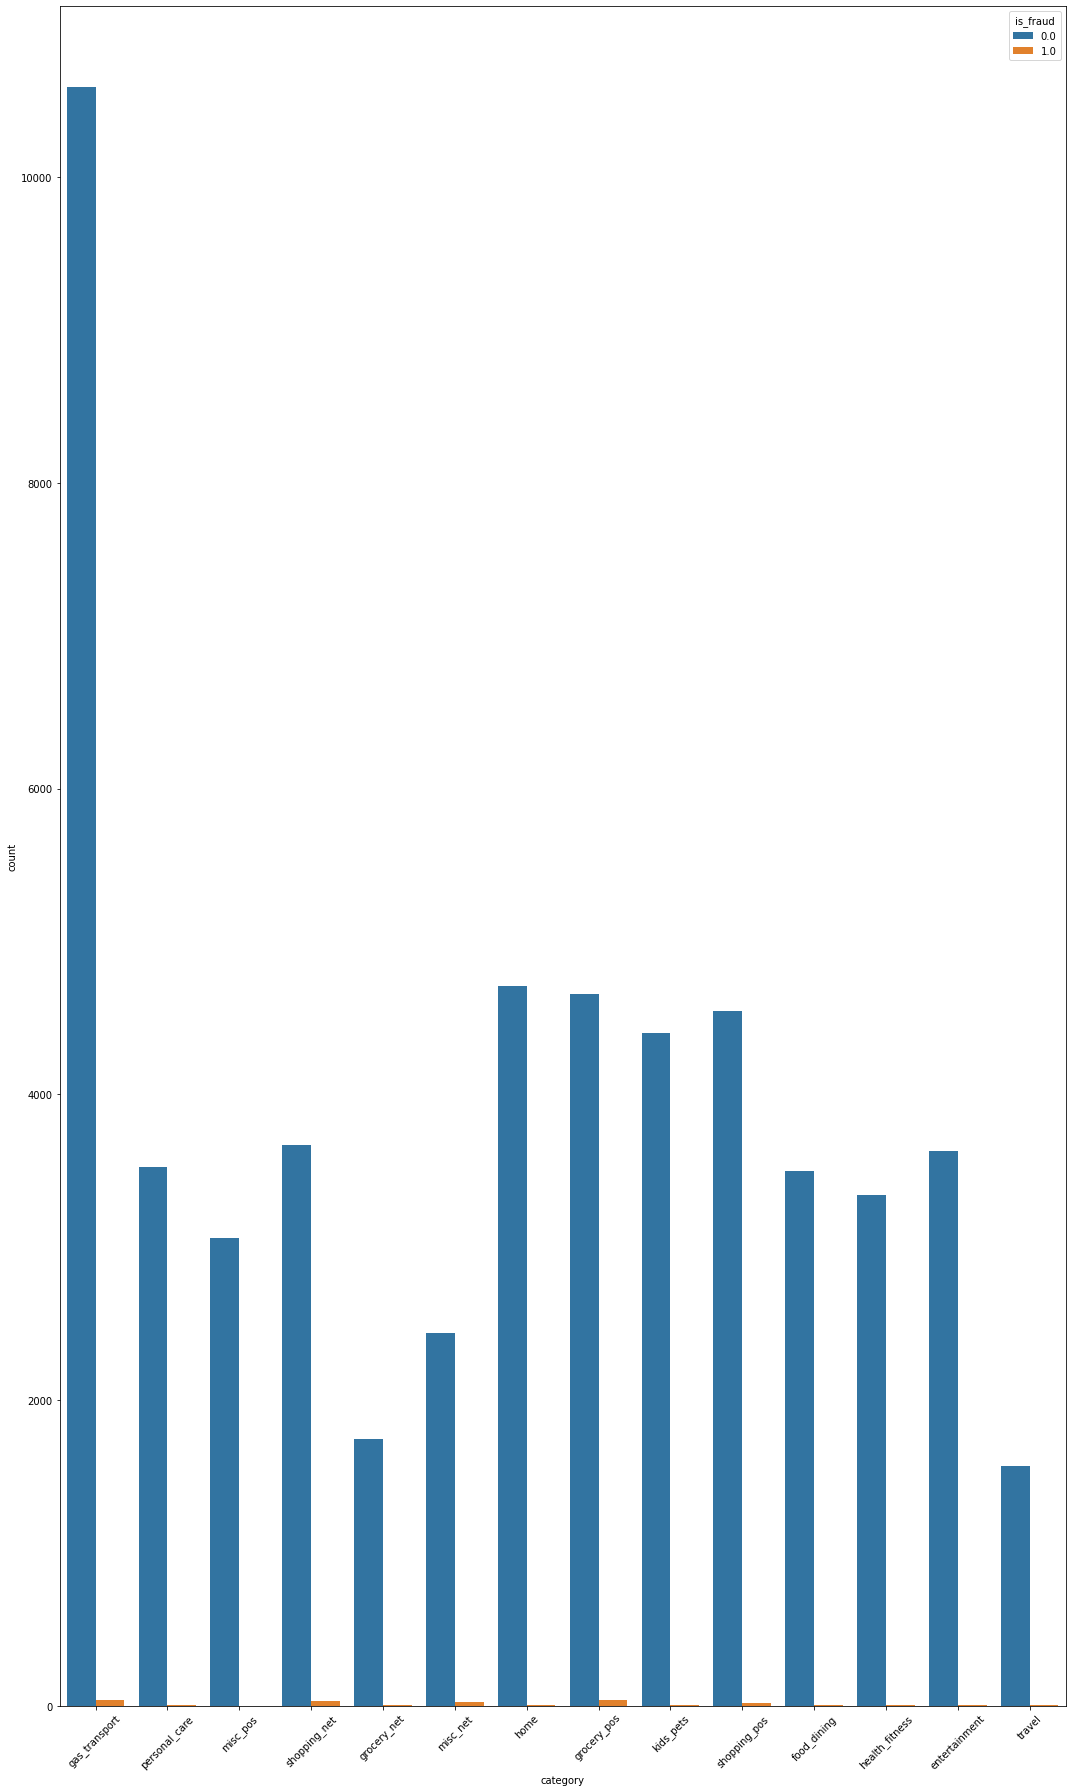

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,25))
sns.countplot('category',hue='is_fraud',data=rows)
plt.xticks(rotation=45)
plt.tight_layout()

<function matplotlib.pyplot.show>

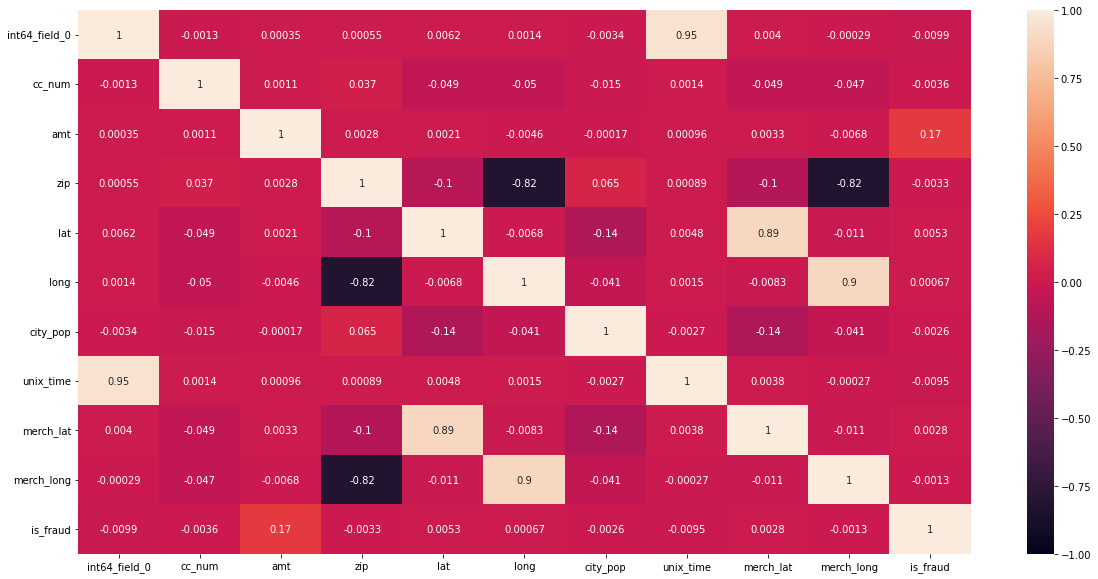

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(rows.corr(),vmin=-1,vmax=1,annot=True)
plt.show

here zip code ,longitude and merchant longitude are highly correlated.Similarly latitude and merchant latitude is also highly correlated.So we can drop some of these features

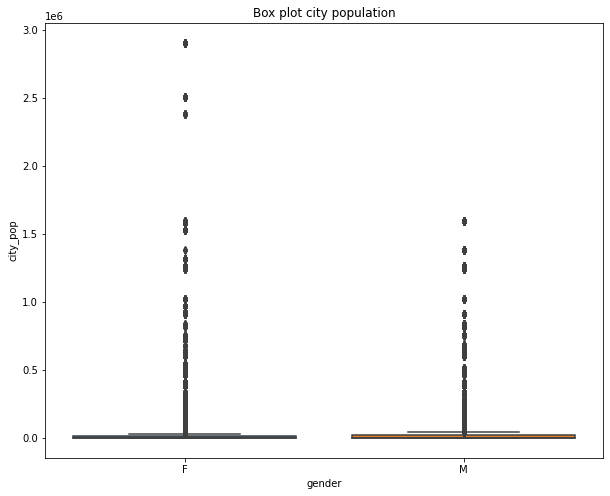

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='gender',y='city_pop',data=rows)
plt.title("Box plot city population")
plt.show()

Q1:  12.425 
Q2:  47.21 
Q3:  78.47
IQR:  66.045
Lower limit is :  -86.6425
Upper limit is :  177.5375
Outliers in the fare feature are :  [354.93, 325.88, 404.64, 188.18, 425.86, 228.66, 236.28, 180.37, 198.42, 217.05, 1899.38, 258.93, 241.82, 580.29, 200.88, 636.04, 535.51, 209.81, 480.98, 208.0, 199.99, 214.74, 460.36, 220.73, 351.67, 181.41, 188.32, 367.81, 202.14, 207.8, 589.05, 439.6, 456.48, 200.43, 536.05, 245.7, 221.92, 261.89, 449.52, 685.31, 183.31, 560.61, 732.5, 219.83, 188.39, 476.9, 415.76, 229.62, 273.39, 1074.89, 226.89, 1195.56, 298.9, 791.57, 224.18, 189.2, 542.54, 244.19, 179.14, 221.83, 215.73, 178.98, 224.48, 187.23, 442.32, 185.8, 202.81, 536.27, 716.32, 483.37, 212.77, 303.79, 191.46, 305.28, 589.25, 590.83, 185.76, 241.2, 862.05, 311.29, 469.53, 232.0, 241.76, 307.61, 194.22, 287.22, 239.71, 1642.13, 196.18, 816.2, 224.54, 496.03, 599.76, 344.81, 334.28, 198.52, 197.16, 197.4, 178.34, 218.26, 212.68, 557.44, 191.67, 655.51, 224.8, 581.74, 379.04, 488.36, 177.54

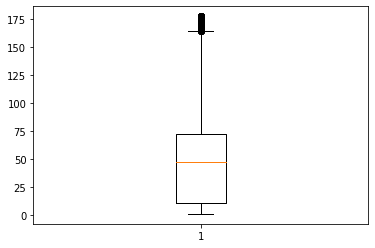

In [ ]:
Q1 = np.percentile(rows['amt'],25,interpolation='midpoint')
Q2 = np.percentile(rows['amt'],50,interpolation='midpoint')
Q3 = np.percentile(rows['amt'],75,interpolation='midpoint')
print('Q1: ',Q1,'\nQ2: ',Q2,'\nQ3: ',Q3)

IQR = Q3 - Q1
print('IQR: ',IQR)

low_lm = Q1-1.5*IQR
upp_lm = Q3+1.5*IQR
print("Lower limit is : ",low_lm)
print("Upper limit is : ",upp_lm)

outliers = []
for i in rows['amt']:
  if((i>upp_lm)or(i<low_lm)):
    outliers.append(i)

print("Outliers in the fare feature are : ",outliers)

indx1 = rows['amt']>upp_lm
outlier_index = rows.loc[indx1].index
outlier_index

rows.drop(outlier_index, inplace=True)

plt.boxplot(rows['amt'])
plt.show()


#q1=np.percentile(rows['amt'],25,interpolation='midpoint')
#q2=np.percentile(rows['amt'],25,interpolation='midpoint')
#q3=np.percentile(rows['amt'],25,interpolation='midpoint')

#IQR=q3-q1
#low_lim=q1-1.5*IQR
#up_lim=q3+1.5*IQR
#print(low_lim)
#print(up_lim)
#outlier=[]
#for x in rows['amt']:
#  if((x>up_lim) or (x<low_lim)):
#    outlier.append(x)
#    ind1=rows['wine_servings']>up_lim
#    data.iloc[ind1].index

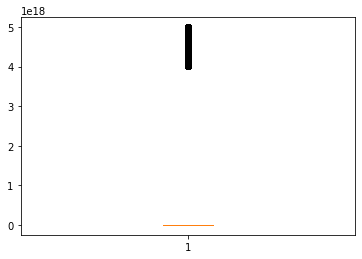

In [ ]:
plt.boxplot(rows['cc_num'])
plt.show()

Q1:  213113028819344.0 
Q2:  3520550088202337.0 
Q3:  4451438912406400.0
IQR:  4238325883587056.0
Lower limit is :  -6144375796561240.0
Upper limit is :  1.0808927737786984e+16
Outliers in the fare feature are :  [4.906628655840914e+18, 4.358137750029945e+18, 4.792627764422478e+18, 4.4674569151533123e+18, 4.390966588600993e+18, 4.5876574021653417e+18, 4.689147265057949e+18, 4.50253952680943e+18, 4.0444367720188447e+18, 4.5600041499838684e+18, 4.1287304540580577e+18, 4.736845434667908e+18, 4.210078554961359e+18, 4.861310130652567e+18, 4.2449536101367055e+18, 4.400011257587662e+18, 4.5876574021653417e+18, 4.469777115158235e+18, 4.390966588600993e+18, 4.497451418073897e+18, 4.358137750029945e+18, 4.958589671582727e+18, 4.5876574021653417e+18, 4.769426683924059e+18, 4.0630949743605714e+18, 4.79893797866756e+18, 4.797297220948469e+18, 4.4620382347436795e+18, 4.810839835482794e+18, 4.956828990005111e+18, 4.761403817546679e+18, 4.792627764422478e+18, 4.181833256558614e+18, 4.958589671582727e+

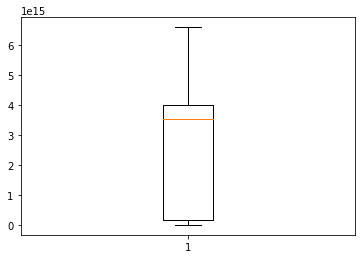

In [ ]:
Q1 = np.percentile(rows['cc_num'],25,interpolation='midpoint')
Q2 = np.percentile(rows['cc_num'],50,interpolation='midpoint')
Q3 = np.percentile(rows['cc_num'],75,interpolation='midpoint')
print('Q1: ',Q1,'\nQ2: ',Q2,'\nQ3: ',Q3)

IQR = Q3 - Q1
print('IQR: ',IQR)

low_lm = Q1-1.5*IQR
upp_lm = Q3+1.5*IQR
print("Lower limit is : ",low_lm)
print("Upper limit is : ",upp_lm)

outliers = []
for i in rows['cc_num']:
  if((i>upp_lm)or(i<low_lm)):
    outliers.append(i)

print("Outliers in the fare feature are : ",outliers)

indx1 = rows['cc_num']>upp_lm
outlier_index = rows.loc[indx1].index
outlier_index

rows.drop(outlier_index, inplace=True)

plt.boxplot(rows['cc_num'])
plt.show()

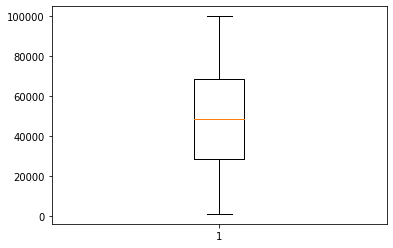

In [ ]:
plt.boxplot(rows['zip'])
plt.show()

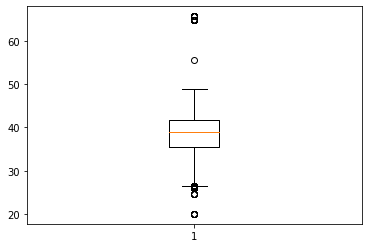

In [ ]:
plt.boxplot(rows['lat'])
plt.show()

Q1:  35.558 
Q2:  38.8856 
Q3:  41.6125
IQR:  6.054499999999997
Lower limit is :  26.476250000000004
Upper limit is :  50.69425
Outliers in the fare feature are :  [64.7556, 26.4215, 26.4215, 26.1184, 26.4215, 26.4215, 64.7556, 26.3304, 26.4215, 26.4722, 26.3304, 64.7556, 65.6899, 26.1184, 64.7556, 26.4215, 26.1184, 64.7556, 26.1184, 26.4215, 26.1184, 26.1184, 26.1184, 26.1184, 26.4722, 26.1184, 24.6557, 26.4722, 26.1184, 26.1184, 26.1184, 26.4215, 26.4722, 26.1184, 26.1184, 26.4215, 26.4722, 26.4215, 64.7556, 26.4215, 26.4215, 26.4722, 26.4722, 20.0271, 24.6557, 26.4215, 26.1184, 26.3304, 26.4215, 26.4215, 26.1184, 26.4215, 26.4215, 64.7556, 64.7556, 26.4215, 26.4215, 26.4215, 26.1184, 26.4215, 26.4722, 26.4722, 26.4722, 26.4722, 64.7556, 26.1184, 64.7556, 26.1184, 26.4215, 26.4215, 26.4722, 64.7556, 26.4215, 26.1184, 26.4722, 26.4722, 26.4215, 64.7556, 26.1184, 26.1184, 65.6899, 26.4215, 26.4215, 26.4215, 64.7556, 26.1184, 26.1184, 26.4215, 26.3771, 26.1184, 26.4722, 26.4722, 26.1184

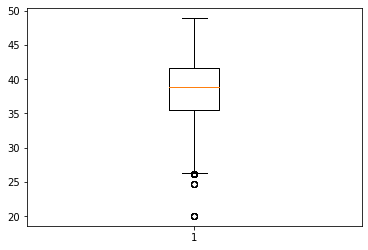

In [ ]:
Q1 = np.percentile(rows['lat'],25,interpolation='midpoint')
Q2 = np.percentile(rows['lat'],50,interpolation='midpoint')
Q3 = np.percentile(rows['lat'],75,interpolation='midpoint')
print('Q1: ',Q1,'\nQ2: ',Q2,'\nQ3: ',Q3)

IQR = Q3 - Q1
print('IQR: ',IQR)

low_lm = Q1-1.5*IQR
upp_lm = Q3+1.5*IQR
print("Lower limit is : ",low_lm)
print("Upper limit is : ",upp_lm)

outliers = []
for i in rows['lat']:
  if((i>upp_lm)or(i<low_lm)):
    outliers.append(i)

print("Outliers in the fare feature are : ",outliers)

indx1 = rows['lat']>upp_lm
outlier_index = rows.loc[indx1].index
outlier_index

rows.drop(outlier_index, inplace=True)

plt.boxplot(rows['lat'])
plt.show()

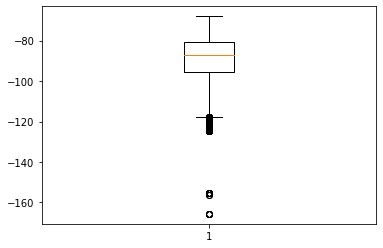

In [ ]:
plt.boxplot(rows['long'])
plt.show()

Q1:  -95.6045 
Q2:  -87.2602 
Q3:  -80.8449
IQR:  14.759600000000006
Lower limit is :  -117.74390000000001
Upper limit is :  -58.70549999999999
Outliers in the fare feature are :  [-118.4924, -122.6847, -122.0107, -118.523, -118.4971, -124.2174, -122.9685, -124.4409, -122.9685, -122.3345, -123.0614, -118.9017, -122.3456, -122.9685, -122.2564, -118.3493, -122.9145, -119.0825, -122.0107, -122.3456, -121.8686, -122.3345, -118.523, -122.5258, -118.0231, -124.1437, -122.3456, -122.478, -122.3345, -120.7986, -122.1866, -119.0825, -120.6649, -119.0825, -122.9145, -118.4971, -122.3456, -120.0936, -121.9898, -122.3456, -122.3345, -118.0231, -122.6616, -118.2105, -122.9145, -119.7957, -122.6847, -118.2105, -123.9743, -118.0818, -118.523, -122.9366, -118.523, -122.478, -123.0614, -121.7913, -122.0107, -123.1065, -121.8686, -118.2322, -120.7986, -119.7957, -118.523, -121.7913, -124.2174, -120.6649, -122.3456, -122.9685, -120.0936, -118.3493, -122.6847, -124.1437, -119.7957, -121.8686, -122.3456, -

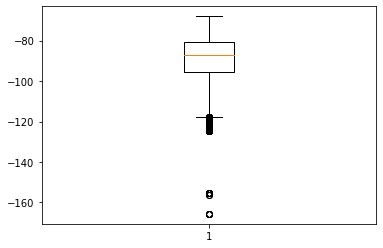

In [ ]:
Q1 = np.percentile(rows['long'],25,interpolation='midpoint')
Q2 = np.percentile(rows['long'],50,interpolation='midpoint')
Q3 = np.percentile(rows['long'],75,interpolation='midpoint')
print('Q1: ',Q1,'\nQ2: ',Q2,'\nQ3: ',Q3)

IQR = Q3 - Q1
print('IQR: ',IQR)

low_lm = Q1-1.5*IQR
upp_lm = Q3+1.5*IQR
print("Lower limit is : ",low_lm)
print("Upper limit is : ",upp_lm)

outliers = []
for i in rows['long']:
  if((i>upp_lm)or(i<low_lm)):
    outliers.append(i)

print("Outliers in the fare feature are : ",outliers)

indx1 = rows['long']>upp_lm
outlier_index = rows.loc[indx1].index
outlier_index

rows.drop(outlier_index, inplace=True)

plt.boxplot(rows['long'])
plt.show()

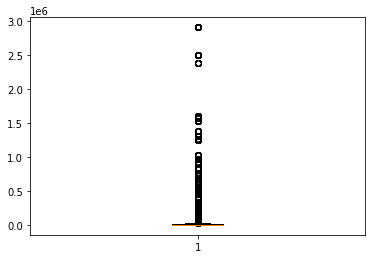

In [ ]:
plt.boxplot(rows['city_pop'])
plt.show()

Q1:  836.0 
Q2:  2408.0 
Q3:  13422.0
IQR:  12586.0
Lower limit is :  -18043.0
Upper limit is :  32301.0
Outliers in the fare feature are :  [92106.0, 1022298.0, 92043.0, 166081.0, 190178.0, 55345.0, 1312922.0, 237282.0, 459921.0, 116001.0, 42817.0, 134056.0, 50489.0, 214703.0, 1312922.0, 841711.0, 910148.0, 84106.0, 67082.0, 47772.0, 34882.0, 190178.0, 139650.0, 214703.0, 493806.0, 46563.0, 165556.0, 59744.0, 34153.0, 1595797.0, 134056.0, 158701.0, 194500.0, 71335.0, 910148.0, 71485.0, 391389.0, 35371.0, 128715.0, 1022298.0, 34153.0, 50835.0, 222785.0, 910148.0, 191096.0, 46944.0, 190178.0, 1526206.0, 79613.0, 46563.0, 92985.0, 105638.0, 158701.0, 2504700.0, 158701.0, 190178.0, 1241364.0, 59744.0, 1312922.0, 54287.0, 88735.0, 2906700.0, 1263321.0, 320420.0, 254282.0, 151785.0, 33804.0, 601723.0, 94014.0, 2906700.0, 413574.0, 34153.0, 320420.0, 93193.0, 973849.0, 378909.0, 1263321.0, 50489.0, 67082.0, 38912.0, 276002.0, 673342.0, 493806.0, 207410.0, 341043.0, 378909.0, 75830.0, 35439.0

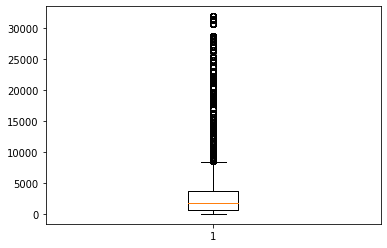

In [ ]:
Q1 = np.percentile(rows['city_pop'],25,interpolation='midpoint')
Q2 = np.percentile(rows['city_pop'],50,interpolation='midpoint')
Q3 = np.percentile(rows['city_pop'],75,interpolation='midpoint')
print('Q1: ',Q1,'\nQ2: ',Q2,'\nQ3: ',Q3)

IQR = Q3 - Q1
print('IQR: ',IQR)

low_lm = Q1-1.5*IQR
upp_lm = Q3+1.5*IQR
print("Lower limit is : ",low_lm)
print("Upper limit is : ",upp_lm)

outliers = []
for i in rows['city_pop']:
  if((i>upp_lm)or(i<low_lm)):
    outliers.append(i)

print("Outliers in the fare feature are : ",outliers)

indx1 = rows['city_pop']>upp_lm
outlier_index = rows.loc[indx1].index
outlier_index

rows.drop(outlier_index, inplace=True)

plt.boxplot(rows['city_pop'])
plt.show()

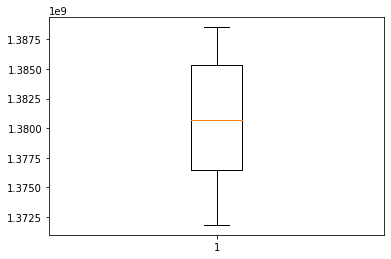

In [ ]:
plt.boxplot(rows['unix_time'])
plt.show()

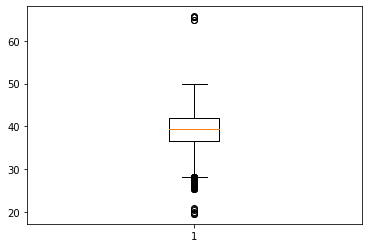

In [ ]:
plt.boxplot(rows['merch_lat'])
plt.show()

Q1:  36.49405 
Q2:  39.297314 
Q3:  42.079972999999995
IQR:  5.585922999999994
Lower limit is :  28.11516550000001
Upper limit is :  50.458857499999986
Outliers in the fare feature are :  [27.370205, 26.995158, 27.193446, 25.90592, 26.731023, 26.262748, 26.290797, 26.289351, 25.956193, 26.202787, 27.555715000000003, 27.169219, 26.303287, 26.592451, 27.362432, 26.750754, 26.223706, 25.597104, 27.015619, 26.908225, 26.236494, 26.951136, 27.398105, 27.707819, 26.723858, 27.2162, 25.936409, 26.528989000000003, 27.136887, 26.273098, 27.134172, 25.635688, 27.017842, 27.725299, 27.171112, 26.182696, 27.507768, 25.993612, 26.984467, 28.042978, 27.276462, 25.42913, 27.049457, 25.727823, 26.759899, 26.0783, 27.96034, 27.712903000000004, 65.53654300000001, 25.971827, 27.362169, 27.378513, 27.862632, 26.324867, 27.007556, 28.076117, 27.595565, 26.779969, 27.119125, 27.801454, 26.9918, 26.569296, 27.266601, 27.673567, 26.585086, 27.531777, 27.090317, 27.708704, 26.363349, 26.898038, 26.639167, 26.6

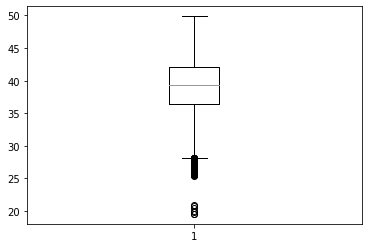

In [ ]:
Q1 = np.percentile(rows['merch_lat'],25,interpolation='midpoint')
Q2 = np.percentile(rows['merch_lat'],50,interpolation='midpoint')
Q3 = np.percentile(rows['merch_lat'],75,interpolation='midpoint')
print('Q1: ',Q1,'\nQ2: ',Q2,'\nQ3: ',Q3)

IQR = Q3 - Q1
print('IQR: ',IQR)

low_lm = Q1-1.5*IQR
upp_lm = Q3+1.5*IQR
print("Lower limit is : ",low_lm)
print("Upper limit is : ",upp_lm)

outliers = []
for i in rows['merch_lat']:
  if((i>upp_lm)or(i<low_lm)):
    outliers.append(i)

print("Outliers in the fare feature are : ",outliers)

indx1 = rows['merch_lat']>upp_lm
outlier_index = rows.loc[indx1].index
outlier_index

rows.drop(outlier_index, inplace=True)

plt.boxplot(rows['merch_lat'])
plt.show()

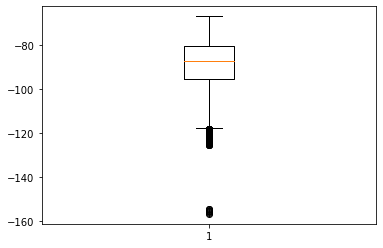

In [ ]:
plt.boxplot(rows['merch_long'])
plt.show()

Q1:  -95.43315150000001 
Q2:  -87.2623245 
Q3:  -80.43993850000001
IQR:  14.993212999999997
Lower limit is :  -117.922971
Upper limit is :  -57.950119000000015
Outliers in the fare feature are :  [-117.992632, -124.524679, -123.13558, -124.47058, -122.479827, -122.294631, -118.403078, -121.850835, -122.090825, -123.461108, -121.340071, -122.012132, -118.783678, -122.295352, -124.72868400000002, -123.307719, -122.862851, -121.542784, -120.89065, -121.18993799999998, -120.052087, -121.408989, -119.669377, -123.555491, -118.240976, -122.078881, -120.421542, -121.44409, -121.479704, -122.904598, -119.203856, -122.597829, -118.464946, -124.442324, -119.67938999999998, -121.745662, -123.682891, -122.459515, -122.198634, -121.205234, -122.47224, -119.990687, -122.616841, -122.241158, -120.878481, -124.811471, -121.914881, -121.727849, -121.541969, -118.342416, -123.196484, -122.415522, -121.577715, -122.84058799999998, -121.68596, -118.703718, -118.354673, -121.125964, -119.540029, -122.70914

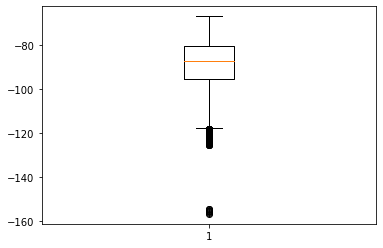

In [ ]:
Q1 = np.percentile(rows['merch_long'],25,interpolation='midpoint')
Q2 = np.percentile(rows['merch_long'],50,interpolation='midpoint')
Q3 = np.percentile(rows['merch_long'],75,interpolation='midpoint')
print('Q1: ',Q1,'\nQ2: ',Q2,'\nQ3: ',Q3)

IQR = Q3 - Q1
print('IQR: ',IQR)

low_lm = Q1-1.5*IQR
upp_lm = Q3+1.5*IQR
print("Lower limit is : ",low_lm)
print("Upper limit is : ",upp_lm)

outliers = []
for i in rows['merch_long']:
  if((i>upp_lm)or(i<low_lm)):
    outliers.append(i)

print("Outliers in the fare feature are : ",outliers)

indx1 = rows['merch_long']>upp_lm
outlier_index = rows.loc[indx1].index
outlier_index

rows.drop(outlier_index, inplace=True)

plt.boxplot(rows['merch_long'])
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
rows['merchant'] = LabelEncoder().fit_transform(rows['merchant'])
rows['merchant'].value_counts()

316    4090
105    110 
70     102 
571    101 
107    98  
273    97  
607    93  
55     91  
243    91  
229    91  
444    90  
474    89  
625    89  
349    89  
322    88  
24     88  
251    87  
461    87  
272    85  
492    85  
241    84  
119    84  
92     83  
15     83  
136    83  
69     82  
148    81  
497    80  
153    80  
435    80  
117    80  
321    80  
549    79  
183    78  
680    78  
498    78  
518    78  
529    78  
559    77  
332    77  
691    77  
652    77  
394    77  
77     77  
100    76  
33     76  
97     76  
407    76  
429    76  
543    76  
522    76  
365    76  
103    76  
231    76  
208    75  
47     75  
358    75  
590    75  
389    75  
157    75  
187    75  
264    74  
39     74  
667    74  
197    74  
603    74  
563    74  
285    74  
610    74  
162    73  
60     73  
508    73  
257    73  
279    73  
192    73  
488    73  
619    72  
660    72  
76     72  
456    72  
287    72  
466    72  
506    72  
558 

In [ ]:
from sklearn.preprocessing import LabelEncoder
rows['category'] = LabelEncoder().fit_transform(rows['category'])
rows['category'].value_counts()

2     7902
6     3397
7     3197
4     3123
12    3060
0     2567
10    2540
11    2518
1     2491
5     2408
9     2083
8     1633
3     1156
13    968 
Name: category, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
rows['first'] = LabelEncoder().fit_transform(rows['first'])
rows['first'].value_counts()

66     4666
265    645 
142    612 
152    529 
231    515 
209    501 
82     475 
164    455 
234    429 
156    417 
330    415 
214    409 
84     398 
169    362 
294    358 
10     348 
65     336 
295    322 
192    317 
220    315 
278    312 
273    300 
292    282 
221    280 
276    267 
147    267 
243    266 
150    266 
190    266 
207    263 
227    263 
141    261 
256    259 
203    250 
83     243 
301    240 
202    240 
260    238 
185    236 
24     236 
275    234 
306    233 
6      227 
270    211 
140    206 
210    204 
201    202 
237    194 
1      193 
15     193 
218    191 
176    186 
212    185 
143    184 
179    179 
123    177 
170    175 
224    174 
312    168 
309    161 
281    159 
11     157 
244    156 
161    155 
310    155 
3      154 
239    154 
60     154 
106    153 
145    152 
313    150 
97     150 
304    149 
247    148 
193    147 
271    144 
134    143 
280    141 
249    141 
54     141 
215    139 
191    137 
160    137 
290 

In [ ]:
from sklearn.preprocessing import LabelEncoder
rows['last'] = LabelEncoder().fit_transform(rows['last'])
rows['last'].value_counts()

383    4729
94     734 
209    617 
441    520 
354    480 
211    448 
251    435 
278    398 
250    336 
243    325 
153    323 
319    314 
400    302 
143    288 
324    285 
4      268 
228    267 
170    263 
365    255 
428    249 
337    245 
364    232 
125    223 
21     221 
53     216 
29     212 
292    211 
424    210 
274    203 
236    202 
208    202 
205    201 
69     200 
344    196 
152    195 
114    195 
181    192 
132    191 
41     190 
384    188 
291    185 
405    177 
160    168 
194    164 
6      164 
403    161 
197    160 
273    159 
397    159 
437    158 
121    157 
161    157 
88     156 
210    151 
212    149 
141    149 
140    148 
293    144 
408    144 
453    143 
432    142 
213    142 
401    141 
351    141 
349    138 
131    138 
280    135 
147    132 
327    131 
286    130 
418    129 
451    128 
248    126 
361    125 
415    124 
346    123 
417    123 
229    122 
12     122 
388    121 
410    121 
109    120 
439    120 
101 

In [ ]:
from sklearn.preprocessing import LabelEncoder
rows['gender'] = LabelEncoder().fit_transform(rows['gender'])
rows['gender'].value_counts()

0    23120
1    15923
Name: gender, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
rows['street'] = LabelEncoder().fit_transform(rows['street'])
rows['street'].value_counts()

634    3925
292    134 
401    134 
207    129 
655    127 
410    126 
559    125 
380    123 
139    123 
394    122 
248    120 
523    118 
348    118 
766    115 
173    115 
393    114 
474    113 
697    112 
57     112 
568    112 
86     112 
275    111 
397    109 
813    109 
431    109 
261    109 
381    109 
438    108 
254    108 
91     107 
9      106 
514    106 
358    105 
367    105 
330    104 
562    104 
258    104 
549    104 
286    104 
874    104 
89     103 
814    103 
491    103 
326    102 
488    101 
767    100 
14     99  
676    98  
22     97  
529    97  
521    97  
705    97  
235    97  
770    96  
730    96  
866    95  
859    95  
279    94  
76     94  
341    93  
724    93  
736    93  
59     93  
5      93  
338    92  
613    92  
554    91  
663    91  
163    90  
601    90  
269    90  
295    90  
436    89  
395    89  
476    88  
392    88  
768    87  
849    86  
641    86  
119    86  
405    85  
694    85  
101    85  
155 

In [ ]:
from sklearn.preprocessing import LabelEncoder
rows['city'] = LabelEncoder().fit_transform(rows['city'])
rows['city'].value_counts()

69     4166
761    192 
157    183 
24     169 
256    167 
736    163 
253    159 
339    154 
737    142 
21     136 
800    136 
218    134 
530    131 
137    127 
562    124 
325    124 
378    122 
390    121 
312    121 
162    119 
364    119 
438    118 
802    117 
126    117 
80     116 
622    114 
735    113 
326    112 
508    111 
186    111 
297    110 
645    109 
646    108 
729    108 
751    106 
647    105 
713    105 
398    104 
83     104 
739    103 
420    103 
391    103 
679    103 
374    102 
733    102 
40     102 
497    102 
202    102 
146    101 
275    101 
505    101 
100    100 
249    99  
487    99  
85     99  
270    99  
706    99  
689    98  
307    98  
801    98  
653    97  
464    96  
50     96  
471    96  
648    95  
518    95  
298    95  
658    95  
242    95  
213    93  
223    92  
362    92  
813    92  
109    91  
687    91  
452    91  
142    90  
797    90  
698    90  
232    90  
149    89  
481    89  
552    88  
437 

In [ ]:
from sklearn.preprocessing import LabelEncoder
rows['state'] = LabelEncoder().fit_transform(rows['state'])
rows['state'].value_counts()

42    6283
33    2502
37    2364
34    1337
13    1265
21    1234
22    1069
23    1060
39    951 
19    930 
11    928 
2     917 
47    917 
48    891 
1     890 
16    870 
4     865 
44    834 
26    771 
14    766 
28    746 
9     727 
24    696 
49    669 
30    667 
35    649 
20    607 
46    568 
15    547 
36    502 
40    478 
27    462 
8     436 
31    414 
41    388 
45    369 
43    352 
25    342 
17    311 
29    294 
6     267 
18    237 
5     211 
3     200 
12    127 
32    107 
7     14  
10    9   
0     2   
38    1   
Name: state, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
rows['job'] = LabelEncoder().fit_transform(rows['job'])
rows['job'].value_counts()

179    4131
289    325 
223    285 
267    282 
180    252 
109    237 
139    233 
38     233 
382    230 
181    221 
92     217 
349    216 
419    213 
261    212 
312    210 
385    206 
232    202 
14     200 
125    198 
104    197 
63     191 
415    190 
451    190 
62     189 
373    187 
313    182 
361    179 
363    177 
383    177 
3      177 
135    175 
430    175 
279    171 
324    171 
450    168 
400    167 
403    165 
108    165 
251    165 
70     164 
99     162 
82     162 
268    161 
258    159 
182    157 
175    156 
308    155 
411    155 
66     151 
250    151 
24     151 
118    149 
378    149 
396    148 
78     147 
369    145 
73     145 
455    145 
242    144 
319    144 
356    142 
435    142 
124    141 
103    141 
348    139 
331    139 
272    139 
296    139 
174    137 
247    136 
368    136 
165    135 
150    135 
452    135 
157    135 
317    134 
173    134 
74     134 
20     132 
140    132 
128    131 
186    130 
229    130 
231 

In [ ]:
from sklearn.preprocessing import LabelEncoder
rows['dob'] = LabelEncoder().fit_transform(rows['dob'])
rows['dob'].value_counts()

711    4088
519    154 
829    137 
681    136 
703    129 
822    129 
628    125 
844    124 
718    123 
416    123 
428    121 
167    120 
832    120 
855    118 
857    117 
744    117 
550    116 
635    115 
227    113 
831    112 
534    112 
588    112 
819    111 
615    111 
444    109 
417    109 
501    109 
865    108 
621    108 
721    107 
497    107 
854    107 
713    106 
842    106 
778    106 
580    106 
746    105 
480    104 
840    104 
66     104 
508    103 
650    103 
512    102 
477    102 
731    102 
478    101 
625    101 
845    99  
525    99  
846    98  
487    98  
430    98  
693    98  
643    97  
632    96  
457    96  
494    96  
644    96  
306    95  
812    95  
530    95  
425    95  
823    95  
719    95  
728    94  
771    93  
787    92  
170    92  
847    92  
488    92  
412    92  
399    92  
523    91  
462    90  
20     90  
687    89  
761    89  
312    88  
402    88  
827    88  
198    87  
441    87  
559    87  
531 

In [ ]:
from sklearn.preprocessing import LabelEncoder
rows['trans_num'] = LabelEncoder().fit_transform(rows['trans_num'])
rows['trans_num'].value_counts()

0        3781
6572     1   
3300     1   
20458    1   
28236    1   
18453    1   
7074     1   
10116    1   
6692     1   
3847     1   
15977    1   
8766     1   
4305     1   
30015    1   
22758    1   
6399     1   
9042     1   
19360    1   
16366    1   
12545    1   
477      1   
4644     1   
725      1   
22281    1   
15324    1   
17538    1   
2230     1   
10018    1   
15929    1   
33221    1   
25293    1   
34812    1   
34477    1   
12773    1   
22195    1   
1433     1   
6237     1   
9614     1   
32987    1   
20427    1   
11440    1   
34958    1   
7087     1   
19195    1   
6468     1   
13462    1   
30411    1   
32976    1   
23173    1   
3011     1   
19330    1   
3724     1   
24510    1   
3204     1   
13819    1   
20973    1   
539      1   
5473     1   
26652    1   
13986    1   
748      1   
9222     1   
14862    1   
9887     1   
27221    1   
30790    1   
1893     1   
26828    1   
19267    1   
5405     1   
9748     1   
5993  

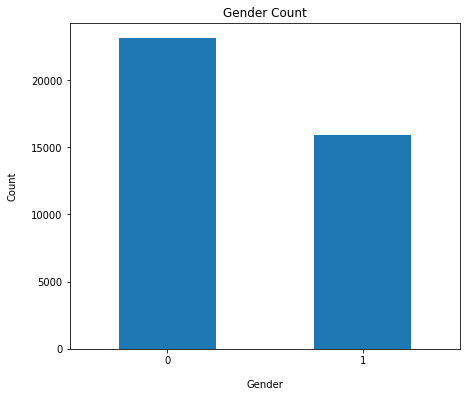

In [ ]:
rows['gender'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Gender Count")
plt.show()

In [ ]:
y=rows["is_fraud"]
x=rows.iloc[:,0:22]
rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39043 entries, 73484 to 374576
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   int64_field_0          39043 non-null  int64  
 1   trans_date_trans_time  39043 non-null  object 
 2   cc_num                 39043 non-null  float64
 3   merchant               39043 non-null  int64  
 4   category               39043 non-null  int64  
 5   amt                    39043 non-null  float64
 6   first                  39043 non-null  int64  
 7   last                   39043 non-null  int64  
 8   gender                 39043 non-null  int64  
 9   street                 39043 non-null  int64  
 10  city                   39043 non-null  int64  
 11  state                  39043 non-null  int64  
 12  zip                    39043 non-null  float64
 13  lat                    39043 non-null  float64
 14  long                   39043 non-null  float64
 1

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32)

print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 27330 samples.
Testing set has 11713 samples.


In [ ]:
rows['new_date'] = [d.date() for d in rows['trans_date_trans_time']]
rows['new_time'] = [d.time() for d in rows['trans_date_trans_time']]
rows['trans_date_trans_time'] = pd.to_datetime(rows['trans_date_trans_time'], utc=True)
rows['year'] = pd.DatetimeIndex(rows['new_date']).year
rows['month'] = pd.DatetimeIndex(rows['new_date']).month
rows['date'] = pd.DatetimeIndex(rows['new_date']).day
rows['hour']=rows.trans_date_trans_time.dt.hour
rows['minute']=rows.trans_date_trans_time.dt.minute
rows['second']=rows.trans_date_trans_time.dt.second

In [ ]:
rows.head()

,int64_field_0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,new_date,new_time,year,month,date,hour,minute,second
73484,332074,2020-10-26 15:17:55+00:00,3.017599e+13,653,2,10.84,260,47,0,53,814,22,48750.235781,47.5375,-95.9941,516.0,24,327,6692,1.380654e+09,47.824850,-96.054007,0.0,2020-10-26,15:17:55,2020,10,26,15,17,55
45684,202618,2020-08-31 14:02:38+00:00,3.560797e+15,551,10,39.46,144,406,0,634,689,27,58569.000000,46.1838,-101.2589,77.0,179,728,28758,1.377958e+09,45.470052,-101.091648,0.0,2020-08-31,14:02:38,2020,8,31,14,2,38
383979,354685,2020-11-05 11:36:37+00:00,3.520550e+15,431,9,102.28,304,383,0,39,69,49,82901.000000,41.6060,-109.2300,27971.0,285,626,2624,1.383651e+09,38.557844,-109.374947,0.0,2020-11-05,11:36:37,2020,11,5,11,36,37
4683,470590,2020-12-13 13:33:27+00:00,3.520550e+15,411,9,47.21,234,160,0,634,218,39,29438.000000,32.5486,-80.3070,2408.0,382,829,15002,1.386942e+09,32.415389,-80.031921,0.0,2020-12-13,13:33:27,2020,12,13,13,33,27
397823,532825,2020-12-27 07:48:21+00:00,5.713143e+11,255,3,47.21,210,270,0,422,455,37,15458.000000,39.8882,-79.8694,2379.0,382,404,23557,1.388131e+09,39.962776,-78.970932,0.0,2020-12-27,07:48:21,2020,12,27,7,48,21


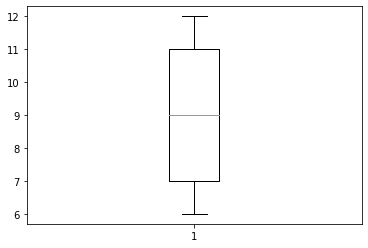

In [ ]:
plt.boxplot(rows['month'])
plt.show()

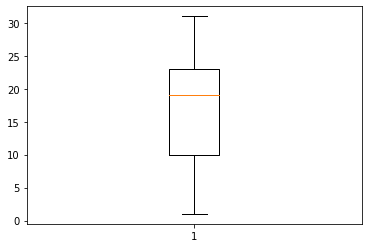

In [ ]:
plt.boxplot(rows['date'])
plt.show()

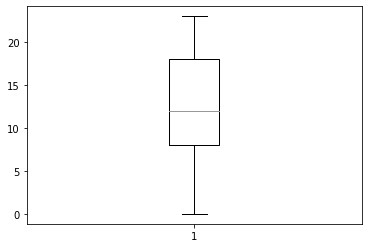

In [ ]:
plt.boxplot(rows['hour'])
plt.show()

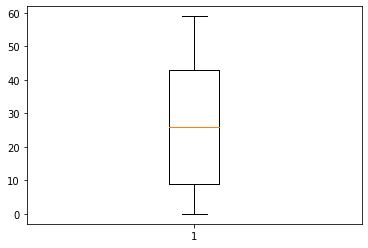

In [ ]:
plt.boxplot(rows['minute'])
plt.show()

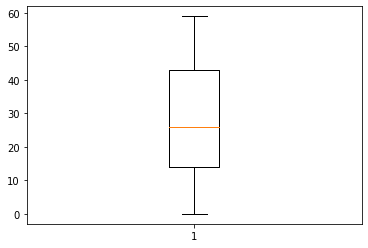

In [ ]:
plt.boxplot(rows['second'])
plt.show()

In [ ]:
rows1=rows

In [ ]:
rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39043 entries, 73484 to 374576
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   int64_field_0          39043 non-null  int64              
 1   trans_date_trans_time  39043 non-null  datetime64[ns, UTC]
 2   cc_num                 39043 non-null  float64            
 3   merchant               39043 non-null  int64              
 4   category               39043 non-null  int64              
 5   amt                    39043 non-null  float64            
 6   first                  39043 non-null  int64              
 7   last                   39043 non-null  int64              
 8   gender                 39043 non-null  int64              
 9   street                 39043 non-null  int64              
 10  city                   39043 non-null  int64              
 11  state                  39043 non-null  int64     

In [ ]:
y=rows1["is_fraud"]
x=rows1.drop(['is_fraud','new_date','new_time','trans_date_trans_time'],axis=1)

In [ ]:
x.shape

(39043, 27)

In [ ]:
y.shape

(39043,)

In [ ]:
y.value_counts()

0.0    38980
1.0    63   
Name: is_fraud, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32)

print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 27330 samples.
Testing set has 11713 samples.


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

#import SMOTE module from imblearn library
#pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 46
Before OverSampling, counts of label '0': 27284 

After OverSampling, the shape of train_X: (54568, 27)
After OverSampling, the shape of train_y: (54568,) 

After OverSampling, counts of label '1': 27284
After OverSampling, counts of label '0': 27284


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39043 entries, 73484 to 374576
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   int64_field_0  39043 non-null  int64  
 1   cc_num         39043 non-null  float64
 2   merchant       39043 non-null  int64  
 3   category       39043 non-null  int64  
 4   amt            39043 non-null  float64
 5   first          39043 non-null  int64  
 6   last           39043 non-null  int64  
 7   gender         39043 non-null  int64  
 8   street         39043 non-null  int64  
 9   city           39043 non-null  int64  
 10  state          39043 non-null  int64  
 11  zip            39043 non-null  float64
 12  lat            39043 non-null  float64
 13  long           39043 non-null  float64
 14  city_pop       39043 non-null  float64
 15  job            39043 non-null  int64  
 16  dob            39043 non-null  int64  
 17  trans_num      39043 non-null  int64  
 18  u

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
def check_model_metrices(y_test, y_pred):
    print('Model Accuracy = ', accuracy_score(y_test, y_pred))
    print('Model Precision = ', precision_score(y_test, y_pred, average='micro'))
    print('Model Recall = ', recall_score(y_test, y_pred, average='micro'))
    print('Model F1 Score = ', f1_score(y_test, y_pred, average='micro'))
    print('Confusion Matrix = \n', confusion_matrix(y_test, y_pred))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

In [ ]:
check_model_metrices(y_test, dt_pred)

Model Accuracy =  0.9961581149150517
Model Precision =  0.9961581149150517
Model Recall =  0.9961581149150517
Model F1 Score =  0.9961581149150517
Confusion Matrix = 
 [[11668    28]
 [   17     0]]


Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

In [ ]:
check_model_metrices(y_test, rf_pred)

Model Accuracy =  0.9985486211901307
Model Precision =  0.9985486211901307
Model Recall =  0.9985486211901307
Model F1 Score =  0.9985486211901307
Confusion Matrix = 
 [[11696     0]
 [   17     0]]


Support Vector Machine Model:

In [ ]:
from sklearn.linear_model import LogisticRegression
lnr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
lnr.fit(x_train, y_train)
lnr_pred = lnr.predict(x_test)

In [ ]:
check_model_metrices(y_test, lnr_pred)

Model Accuracy =  0.9985486211901307
Model Precision =  0.9985486211901307
Model Recall =  0.9985486211901307
Model F1 Score =  0.9985486211901307
Confusion Matrix = 
 [[11696     0]
 [   17     0]]


Polynomial SVM:

In [ ]:
from sklearn.svm import SVC
pol = SVC(kernel='poly', degree = 3, decision_function_shape='ovo')
pol.fit(x_train, y_train)
pol_pred = pol.predict(x_test)
check_model_metrices(y_test, pol_pred)

Model Accuracy =  0.9985486211901307
Model Precision =  0.9985486211901307
Model Recall =  0.9985486211901307
Model F1 Score =  0.9985486211901307
Confusion Matrix = 
 [[11696     0]
 [   17     0]]


Radial Basis Function (RBF) SVM:

In [ ]:
rbf = SVC(kernel='rbf', decision_function_shape='ovo')
rbf.fit(x_train, y_train)
rbf_pred = rbf.predict(x_test)
check_model_metrices(y_test, rbf_pred)

Model Accuracy =  0.9985486211901307
Model Precision =  0.9985486211901307
Model Recall =  0.9985486211901307
Model F1 Score =  0.9985486211901307
Confusion Matrix = 
 [[11696     0]
 [   17     0]]
